In [1]:
from rdkit import RDLogger, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors, Lipinski
from rdkit.Chem.Draw import IPythonConsole
RDLogger.DisableLog('rdApp.*')

import numpy as np
import pandas as pd

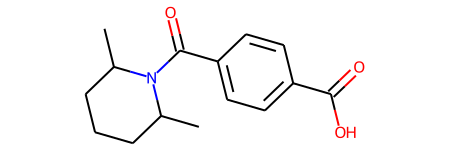

In [2]:
ex = Chem.MolFromSmiles('CC1CCCC(C)N1C(=O)c1ccc(C(=O)O)cc1')
ex

In [3]:
print(Lipinski.NumHAcceptors(ex), 
      Lipinski.FractionCSP3(ex), 
      Lipinski.HeavyAtomCount(ex), 
      Lipinski.NHOHCount(ex), 
      Lipinski.NOCount(ex),
      Lipinski.NumAliphaticCarbocycles(ex),
      Lipinski.NumAliphaticHeterocycles(ex),
      Lipinski.NumAliphaticRings(ex),
      Lipinski.NumAromaticCarbocycles(ex),
      Lipinski.NumAromaticHeterocycles(ex),
      Lipinski.NumAromaticRings(ex),
      Lipinski.NumHAcceptors(ex),
      Lipinski.NumHDonors(ex),
      Lipinski.NumHeteroatoms(ex),
      Lipinski.NumRotatableBonds(ex),
      Lipinski.NumSaturatedCarbocycles(ex),
      Lipinski.NumSaturatedHeterocycles(ex),
      Lipinski.NumSaturatedRings(ex),
      Lipinski.RingCount(ex))

2 0.4666666666666667 19 1 4 0 1 1 1 0 1 2 1 4 2 0 1 1 2


ultimately the ones that i would like to use include: MolWt, MolLogP, NumHDonors, NumHAcceptors, TPSA, NumRotatableBonds

In [4]:
Descriptors.MolWt(ex)
Descriptors.MolLogP(ex)
Descriptors.NumHDonors(ex)
Descriptors.NumHAcceptors(ex)
Descriptors.TPSA(ex)
Descriptors.NumRotatableBonds(ex)

2

In [5]:
def smiles2mols(smiles_list):

    mols_list = []
    
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol != None:
            mols_list.append(mol)
    
    invalid = len(smiles_list) - len(mols_list)
    
    print('Number of Invalid: ', invalid)
    
    return mols_list

In [15]:
def gen_descriptors(smiles_list):
    
    descriptors_list = []
    num_smiles = len(smiles_list)
    num_descriptors = 21
    
    for smiles in smiles_list:
        row = [Descriptors.MolWt(smiles), 
               Descriptors.MolLogP(smiles), 
               Descriptors.NumHDonors(smiles), 
               Descriptors.NumHAcceptors(smiles), 
               Descriptors.TPSA(smiles), 
               Descriptors.NumRotatableBonds(smiles),
               
               Lipinski.FractionCSP3(smiles), 
               Lipinski.HeavyAtomCount(smiles), 
               Lipinski.NHOHCount(smiles), 
               Lipinski.NOCount(smiles),
               Lipinski.NumAliphaticCarbocycles(smiles),
               Lipinski.NumAliphaticHeterocycles(smiles),
               Lipinski.NumAliphaticRings(smiles),
               Lipinski.NumAromaticCarbocycles(smiles),
               Lipinski.NumAromaticHeterocycles(smiles),
               Lipinski.NumAromaticRings(smiles),
               Lipinski.NumHeteroatoms(smiles),
               Lipinski.NumSaturatedCarbocycles(smiles),
               Lipinski.NumSaturatedHeterocycles(smiles),
               Lipinski.NumSaturatedRings(smiles),
               Lipinski.RingCount(smiles)]
        
        descriptors_list = np.concatenate((descriptors_list, row), axis=0)
        
    descriptors_list = descriptors_list.reshape(num_smiles, num_descriptors)
    
    headers = ['MolWt', 
               'MolLogP', 
               'NumHDonors', 
               'NumHAcceptors', 
               'TPSA', 
               'NumRotatableBonds', 
               'FractionCSP3', 
               'HeavyAtomCount', 
               'NHOHCount', 
               'NOCount', 
               'NumAliphaticCarbocycles', 
               'NumAliphaticHeterocycles', 
               'NumAliphaticRings', 
               'NumAromaticCarbocycles', 
               'NumAromaticHeterocycles', 
               'NumAromaticRings', 
               'NumHeteroatoms', 
               'NumSaturatedCarbocycles', 
               'NumSaturatedHeterocycles', 
               'NumSaturatedRings', 
               'RingCount']
    
    print('Number of headers: ' + str(len(headers)))

    df = pd.DataFrame(descriptors_list, columns = headers) 
    
    return df

Something to consider: pairwise diversity between molecules in the dataset - can make diversity dataset

In [11]:
sample = pd.read_csv(r'/Users/alee224/Desktop/AI Drug Discovery/Fibroblast Activating Protein Project/QSAR/sampled_smiles.csv', header = None)
sample[0]

0                     CC1CCCC(C)N1C(=O)c1ccc(C(=O)O)cc1
1      COc1cc(C=CC(=O)OCC(=O)NC(Cc2ccccc2)C(=O)OC)ccc1O
2     CC(C)(C)Oc1cc2nc(SCc3ccccc3)nc(N3CCN(C4CCCCCC4...
3                     COc1cccc2c1CN(C(=O)c1ccc(C)o1)CC2
4                N#Cc1ccc(N2CCCC(C(=O)NCc3ccccc3)C2)cc1
                            ...                        
95                 CN(C)CCCC(=O)NC(c1ccc(F)cc1)c1cccnc1
96    CC(C)(CC(=O)Nc1cc(C(F)(F)F)ccc1Cl)c1ccc(Cl)c(N...
97            COc1ccc(C(=O)Nc2cccc(C(=O)NC3CC3)c2)cc1OC
98                      COC(=O)c1ccc(C(=O)NC(C)CC#N)cc1
99     CC1(C)Cc2c(sc3ccc(S(=O)(=O)C4CCCCC4)cc23)OC1(C)O
Name: 0, Length: 100, dtype: object

In [12]:
rough_sampled_smiles = []

for smiles in sample[0]:
    rough_sampled_smiles.append(smiles)
    
mols = smiles2mols(rough_sampled_smiles)
#mols

Number of Invalid:  8


In [16]:
gen_descriptors(mols).head()

Number of headers: 21


,MolWt,MolLogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,...,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHeteroatoms,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount
0,261.321,2.78790,1.0,2.0,57.61,2.0,0.466667,19.0,1.0,4.0,...,1.0,1.0,1.0,0.0,1.0,4.0,0.0,1.0,1.0,2.0
1,413.426,1.85770,2.0,7.0,111.16,9.0,0.227273,30.0,2.0,8.0,...,0.0,0.0,2.0,0.0,2.0,8.0,0.0,0.0,0.0,2.0
2,522.734,7.08330,0.0,6.0,41.49,6.0,0.533333,37.0,0.0,5.0,...,1.0,2.0,2.0,1.0,3.0,7.0,1.0,1.0,2.0,5.0
3,271.316,2.79512,0.0,3.0,42.68,2.0,0.312500,20.0,0.0,4.0,...,1.0,1.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,3.0
4,319.408,3.09108,1.0,3.0,56.13,4.0,0.300000,24.0,1.0,4.0,...,1.0,1.0,2.0,0.0,2.0,4.0,0.0,1.0,1.0,3.0
